<a href="https://colab.research.google.com/github/Anjalikhillare/Mobile-Price-Range-Prediction/blob/main/Anjali_Khillare_Final_Caps_Project_3_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Mobile Price Range Prediction**
Project Type - Classification

Contribution - Individual

Team Member 1 -Anjali Khillare




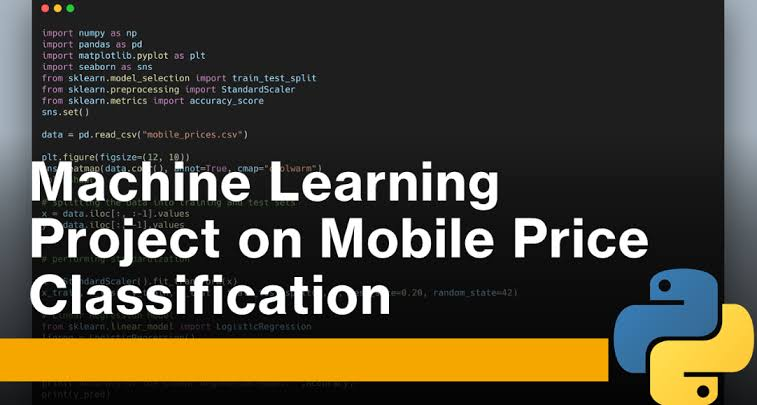

#**Problem Statement**

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.


#**Project Summary**
 
The crucial component of marketing and business is cost prediction and same process can be used to estimate costs for all products such as cars,food, medication, laptops, etc.
Finding the ideal product (with the lowest price and highest features) is the best marketing strategy. As a result, products can be contrasted based on factors like specification, price, manufacturer, etc.
A decent product can be recommended to a customer by identifying their price range.Using several machine learning algorithms,mobile price prediction system is created in the following project. This project will categorise the mobile price range.The dataset's price range will be covered.With the help of the ML algorithms, mobile pricing categorization has been trained. This model categorises the selection of mobile devices based on several features, including camera, cores, battery,internal memory, battery capacity, etc.Graphs has been used to compare all the models after training them with different techniques.

**Future Scope**

To improve accuracy and anticipate the price of the products accurately, more advanced artificial intelligence algorithms can be applied.

Market price forecasting software or mobile applications can be created for any newly released product.

The data collection should be expanded in order to maximise accuracy and provide predictions that are more precise. 

Additionally, using more accurate features can improve accuracy. Therefore, to increase accuracy, the data collection should be big and more useful attributes should be chosen.


#**GitHub Link**

https://github.com/Anjalikhillare/Mobile-Price-Range-Prediction.git

#**Data Description**

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_heig Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery can last over a call

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1 (medium cost), 2(high cost) and 3(very high cost)

#**Flow Chart**

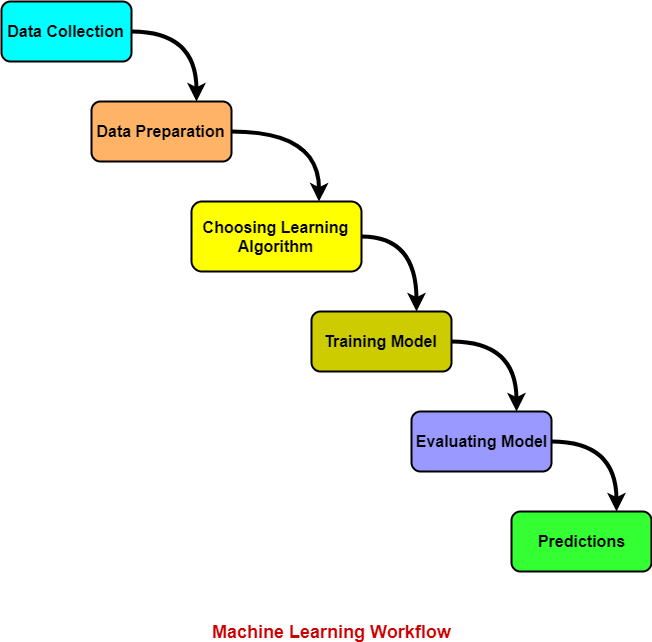

#**Importing Libraries**

In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')
df = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

#**Data Summarization**

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# Dataset Rows & Columns count
df.count()
print(df.head())
 
# obtaining the shape
print("shape of dataframe", df.shape)
 
# obtaining the number of rows
print("# of rows : ", df.shape[0])
 
# obtaining the number of columns
print("# of columns : ", df.shape[1])

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# % of null values in each column
round(df.isnull().sum()/len(df.index)*100)

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [ ]:
# Duplicate Values
print(len(df[df.duplicated()]))

0


In [ ]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Here it is observed that, minimum value of sc_w and px_height cannot be zero.Let us see the count of those values ie, which equals to zero.

In [ ]:
# Count of mobiles with sc_w = 0
print(len(df[df.sc_w == 0]))
# Count of mobiles with px_height = 0
print(len(df[df.px_height == 0]))

180
2


In [ ]:
# Assigning mean values to sc_W and px_height for their zero values
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()

In [ ]:
# Revised count of mobiles for sc_w and px_height
print(len(df[df.sc_w == 0]))
print(len(df[df.px_height == 0]))

0
0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


Here the mean value changed for both px_height and sc_w

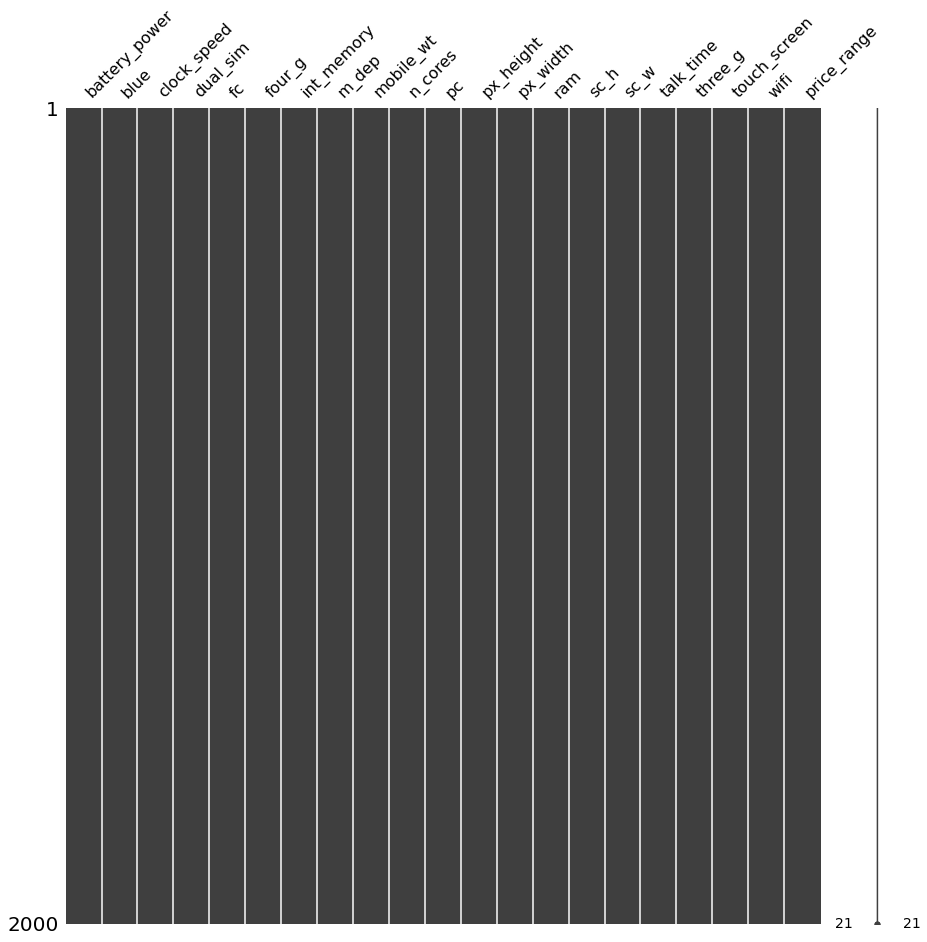

In [ ]:
# Missing Values
import missingno as msno
msno.matrix(df,figsize=(15,15))


Given that many machine learning algorithms do not allow missing values, the management of missing data is crucial during the dataset's preprocessing.Here,it can be seen that there is no presence of missing values in the given dataset.

**Detection of outliers with examination of skewness and probablity plot**

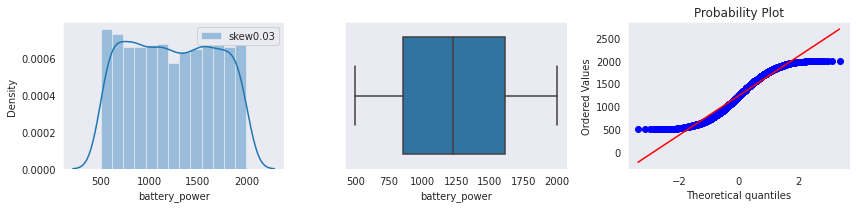

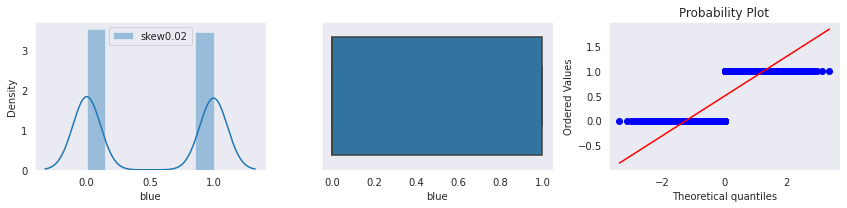

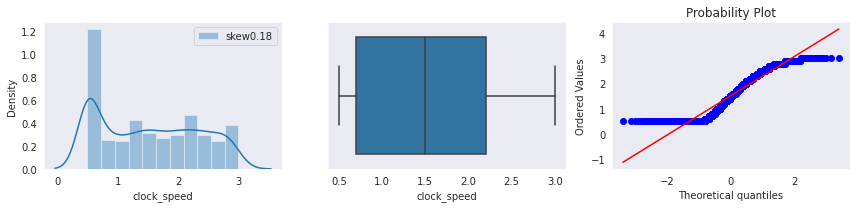

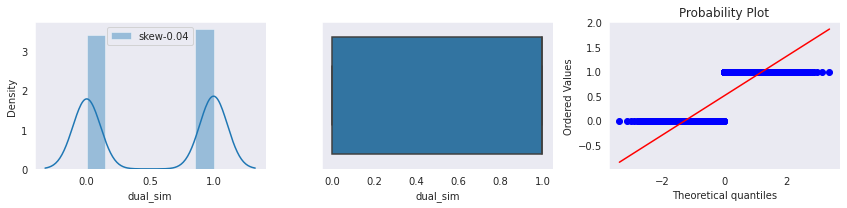

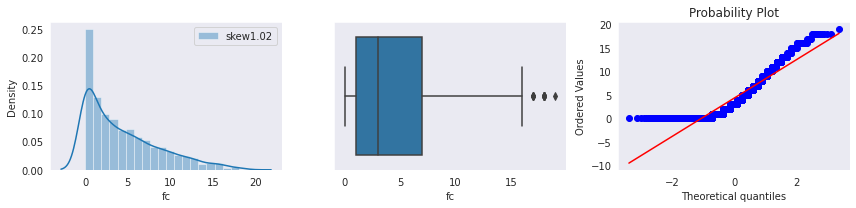

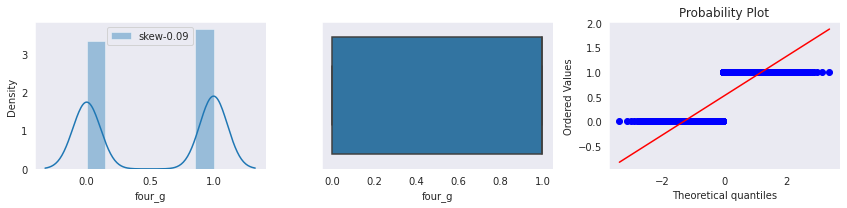

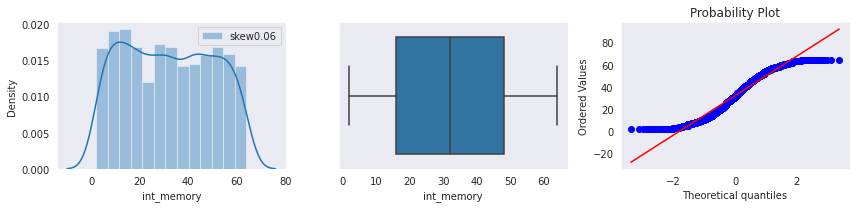

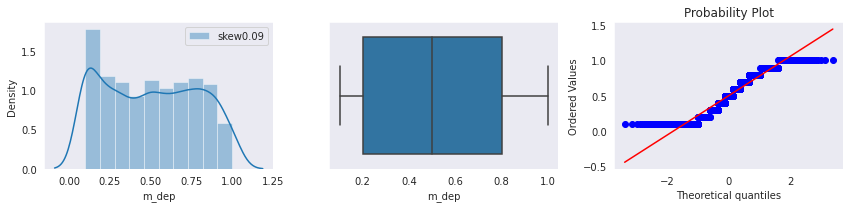

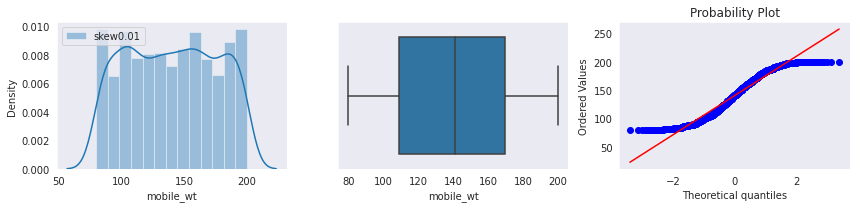

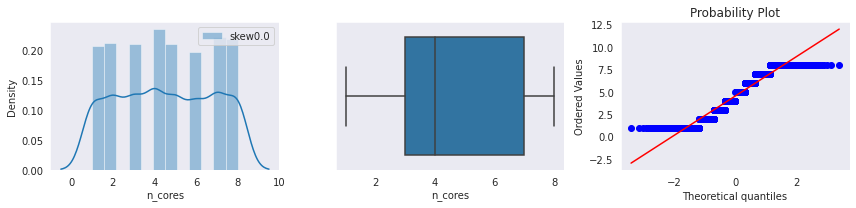

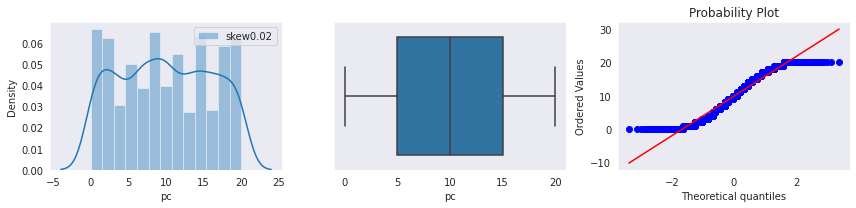

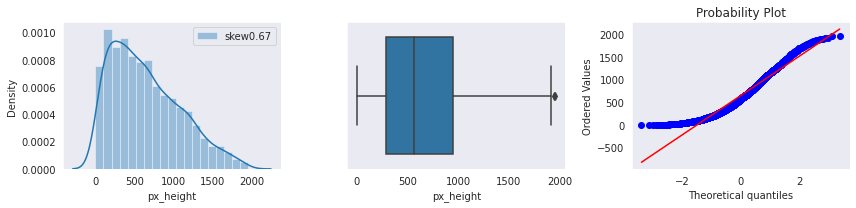

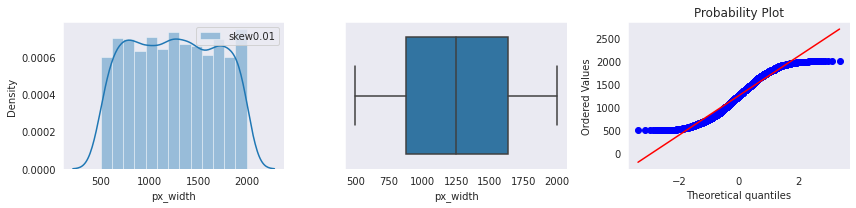

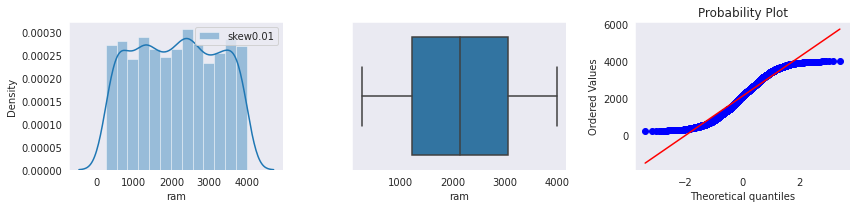

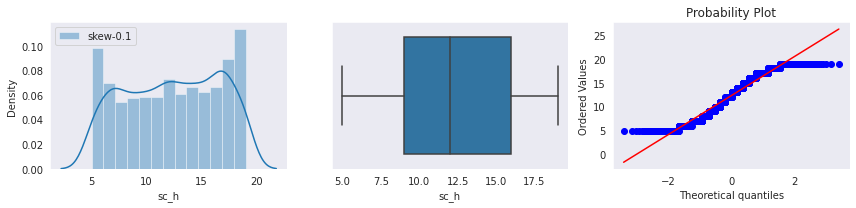

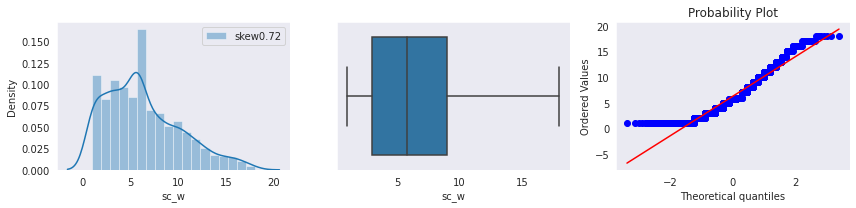

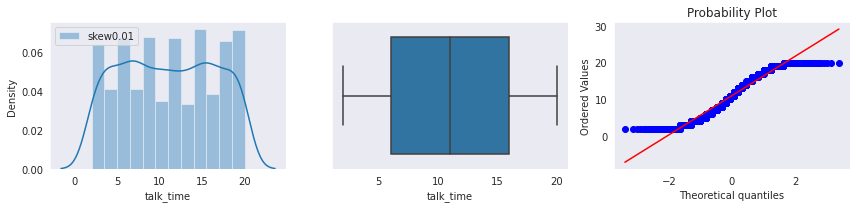

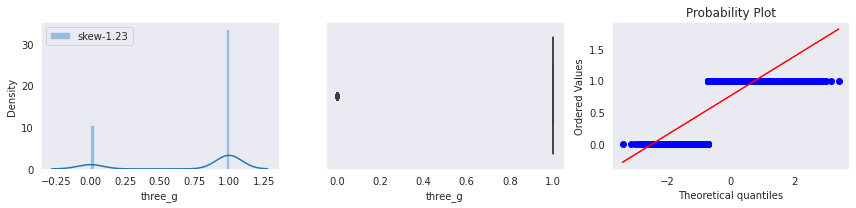

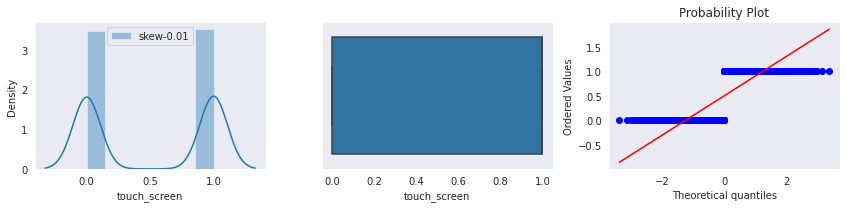

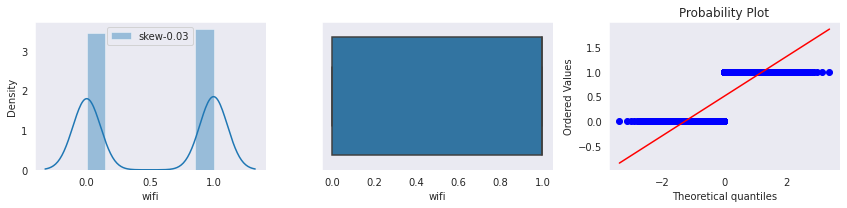

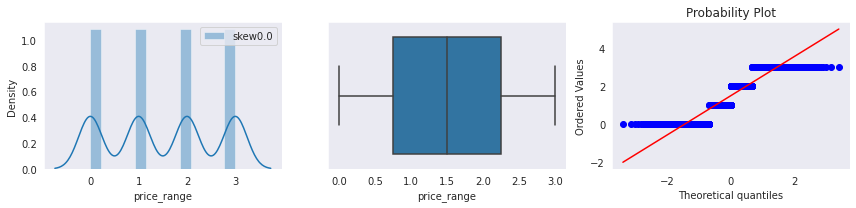

In [ ]:
from scipy import stats
sns.set_style('dark')
for col in df.describe().columns:
  plt.figure(figsize=(12,3))

  # Skewness Distribution
  plt.subplot(131)
  sns.distplot(df[col], label="skew" + str(np.round(df[col].skew(), 2)))
  plt.legend()

  # Boxplot - For outliers detection
  plt.subplot(132)
  sns.boxplot(df[col])
  
  # Probability plot
  plt.subplot(133)
  stats.probplot(df[col], plot=plt)
  plt.tight_layout()
  plt.show()

**1.Skewness Plot**

Skewed data is defined as data that causes an uneven, distorted curve on a graph.In statistics, a data set with a normal distribution has a bell-shaped, symmetrical graph. The tail of skewed data, however, is on either side of the graph.
**Observation-**Right skewness is observed in fc,px_height and sc_w

**2.Boxplot**

Data distribution in a data collection is assessed using boxplots. Three quartiles are used to split the data collection. The first quartile and third quartile of the data set, as well as the median, are represented in this graph. By creating boxplots for each data collection, it is also useful for comparing how data are distributed among them.**Observation**-Presence of outliers is seen in fc,px_height


**3.Probability Plot** 

Probablity plot is a visual method for determining whether a data set fits a specific distribution, like the normal. Plotting the data in relation to a theoretical distribution should result in the dots roughly forming a straight line. This line's deviations signify deviations from the expected distribution.An indicator of how well the data is fitted linearly is the correlation coefficient linked with the probability plot.**Observation**-Sample data that is somewhat normally distributed is of battery_power,int_memory,mobile_wt,px_width,ram.

In [ ]:
# Categorizing dataset into numerical and categorical data
from locale import D_FMT
df_num = df[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_width','px_height','ram', 'sc_h', 'talk_time','sc_w']]

df_cat = df[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [ ]:
#Using IQR method for removal of outliers
def outlinefree(dataCol):     
      
    sorted(dataCol)                          
    Q1,Q3 = np.percentile(dataCol,[25,75])   
    IQR = Q3-Q1                              
    LowerRange = Q1-(1.5 * IQR)              
    UpperRange = Q3+(1.5 * IQR)              
    
    colname = dataCol.tolist()              
    newlist =[]                              
    for i in range(len(colname)):
        
        if colname[i] > UpperRange:          
            colname[i] = UpperRange          
            newlist.append(colname[i])       
        elif colname[i] < LowerRange:        
            colname[i] = LowerRange        
            newlist.append(colname[i])       
        else:
            colname[i]                       
            newlist.append(colname[i])   
            
        

    return newlist

In [ ]:
for i in range(len(df_num.columns)):
    new_list =  outlinefree(df.loc[:,df_num.columns[i]])
    df.loc[:,df_num.columns[i]] = new_list  

In [ ]:
df_final_num = df[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

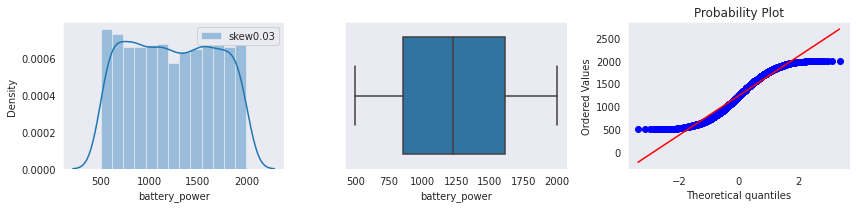

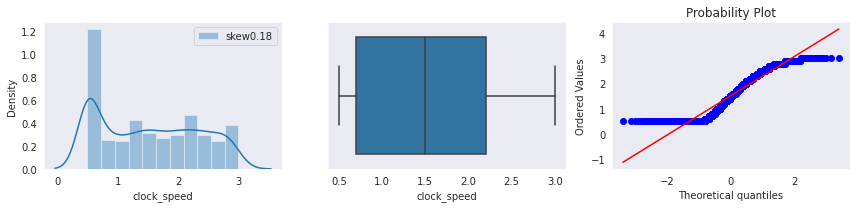

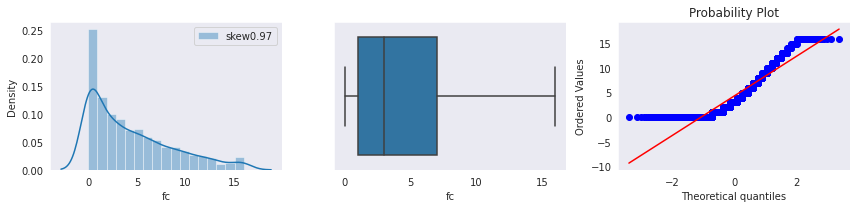

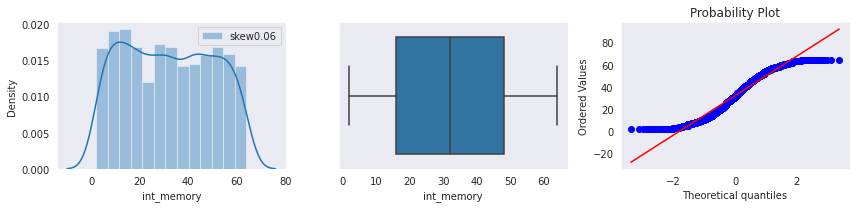

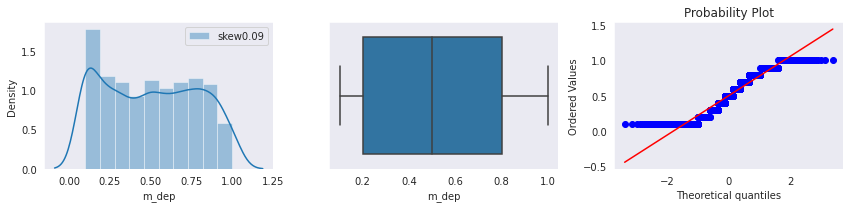

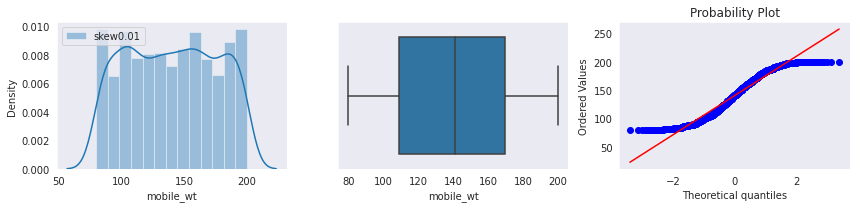

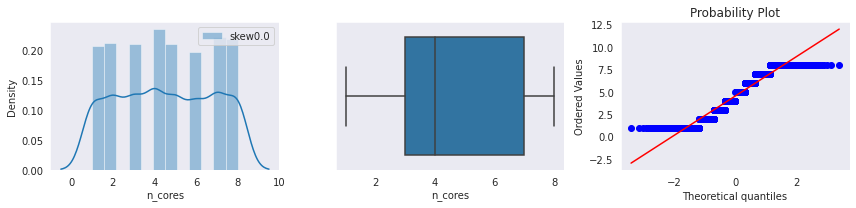

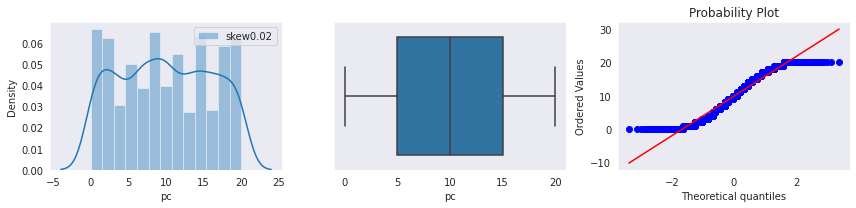

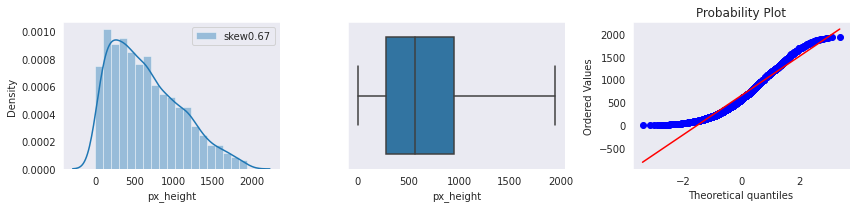

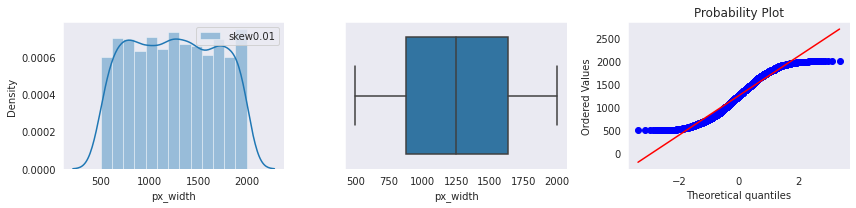

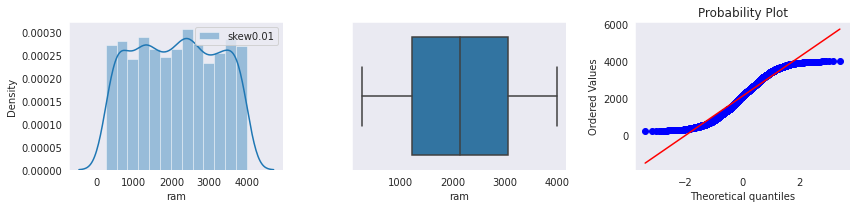

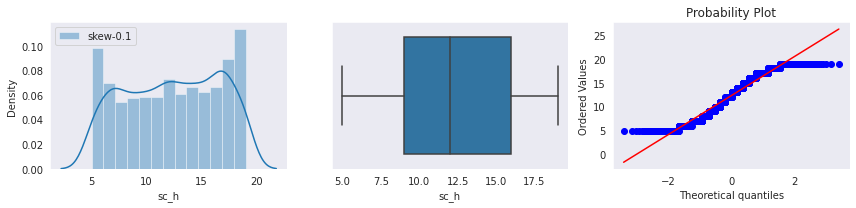

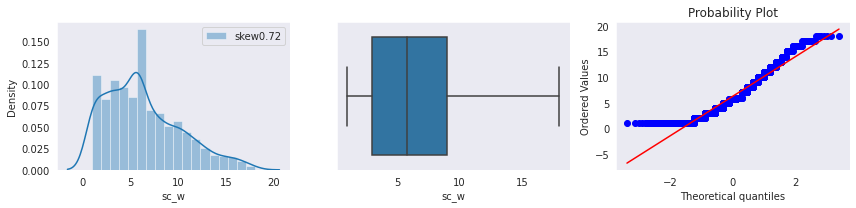

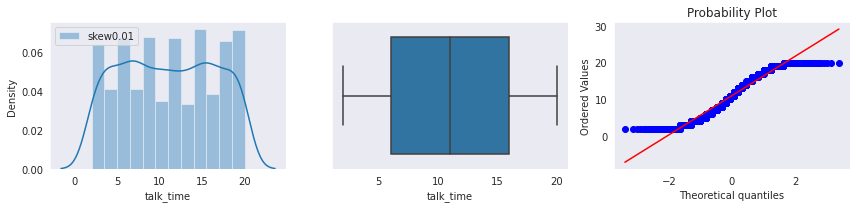

In [ ]:
# Boxplot for removed outliers verification

sns.set_style('dark')
for col in df_final_num.describe().columns:
  plt.figure(figsize=(12,3))
  # Distribution
  plt.subplot(131)
  sns.distplot(df_final_num[col], label="skew" + str(np.round(df_final_num[col].skew(), 2)))
  plt.legend()
  # Boxplot - outliers
  plt.subplot(132)
  sns.boxplot(df[col])
  # probability plot
  plt.subplot(133)
  stats.probplot(df[col], plot=plt)
  plt.tight_layout()
  plt.show()

From the boxplot we can observe that ouliers has been removed.

#**Exploratory Data Analysis**

**1.Univariate Analysis**

So our taregt variable price_range has 4 classes.Let us see those classes.

Price range classes [1 2 3 0]


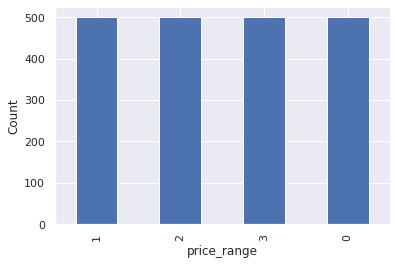

In [ ]:
print('Price range classes',df['price_range'].unique())
sns.set()
price_plot=df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range',rotation=0)
plt.ylabel('Count')
plt.show()

Let us define our target column as "y" and rest data which is used as inputs as "x"

In [ ]:
y = df['price_range']
x = df.drop('price_range', axis = 1)

**Balance-Imbalance of Dataset**

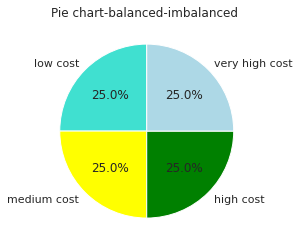

In [ ]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = df['price_range'].value_counts().values
colors = ['turquoise','yellow','green','lightblue']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90)
ax1.set_title('Pie chart-balanced-imbalanced ')
plt.show()

We can observe from the pie chart that our dataset is balanced, with equal distribution of each price range group.

**Plot of Categorical features**

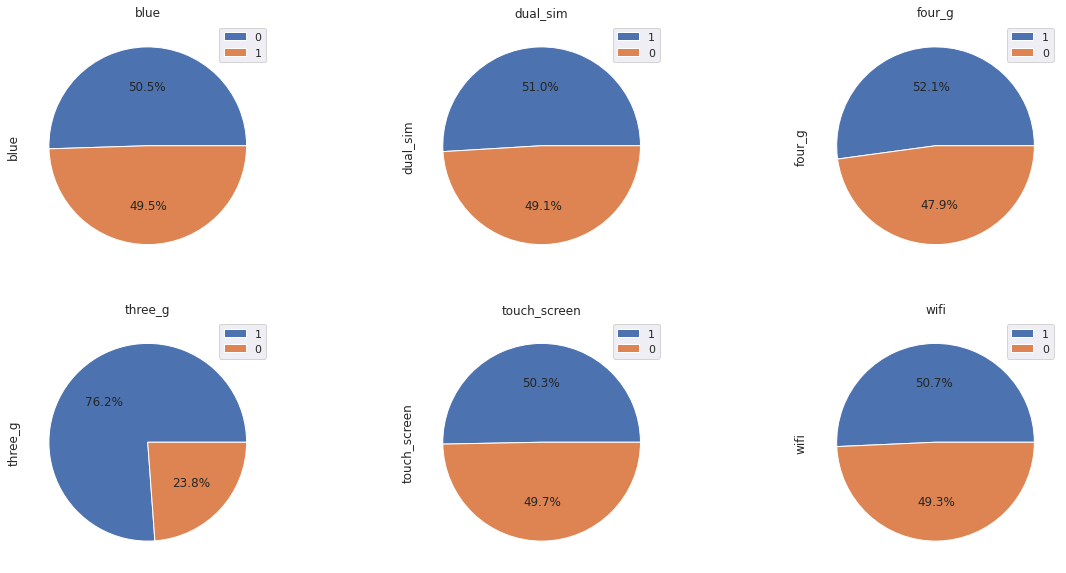

In [ ]:
plt.figure(figsize=(20,10))
j=1
for i in df_cat.columns:
  plt.subplot(2, 3, j)
  j+=1
  colors = ['turquoise','yellow']
  df_cat[i].value_counts().plot.pie (autopct='%1.1f%%',labeldistance=None)
  plt.legend()
 
# plt.ylabel('')
  plt.title(i)

**Plot of Numerical Features**

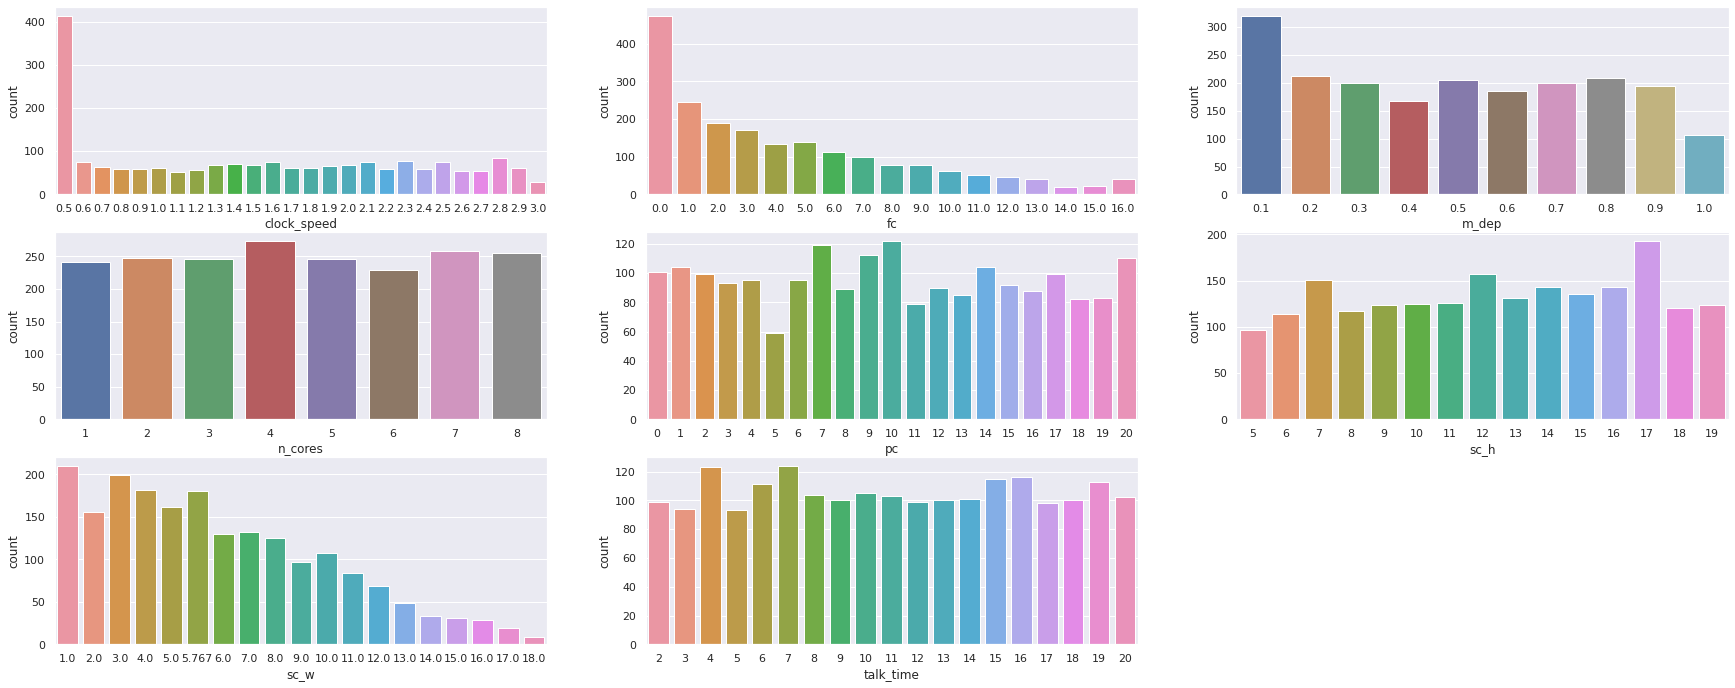

In [ ]:
count_df = df[['clock_speed', 'fc','m_dep','n_cores','pc','sc_h', 'sc_w', 'talk_time']]
plt.figure(figsize=(30,20))
j = 1
for i in count_df.columns:
  plt.subplot(5,3,j)
  sns.countplot(x=df[i])
  j=j+1
 

**2.Bivariate Analysis**

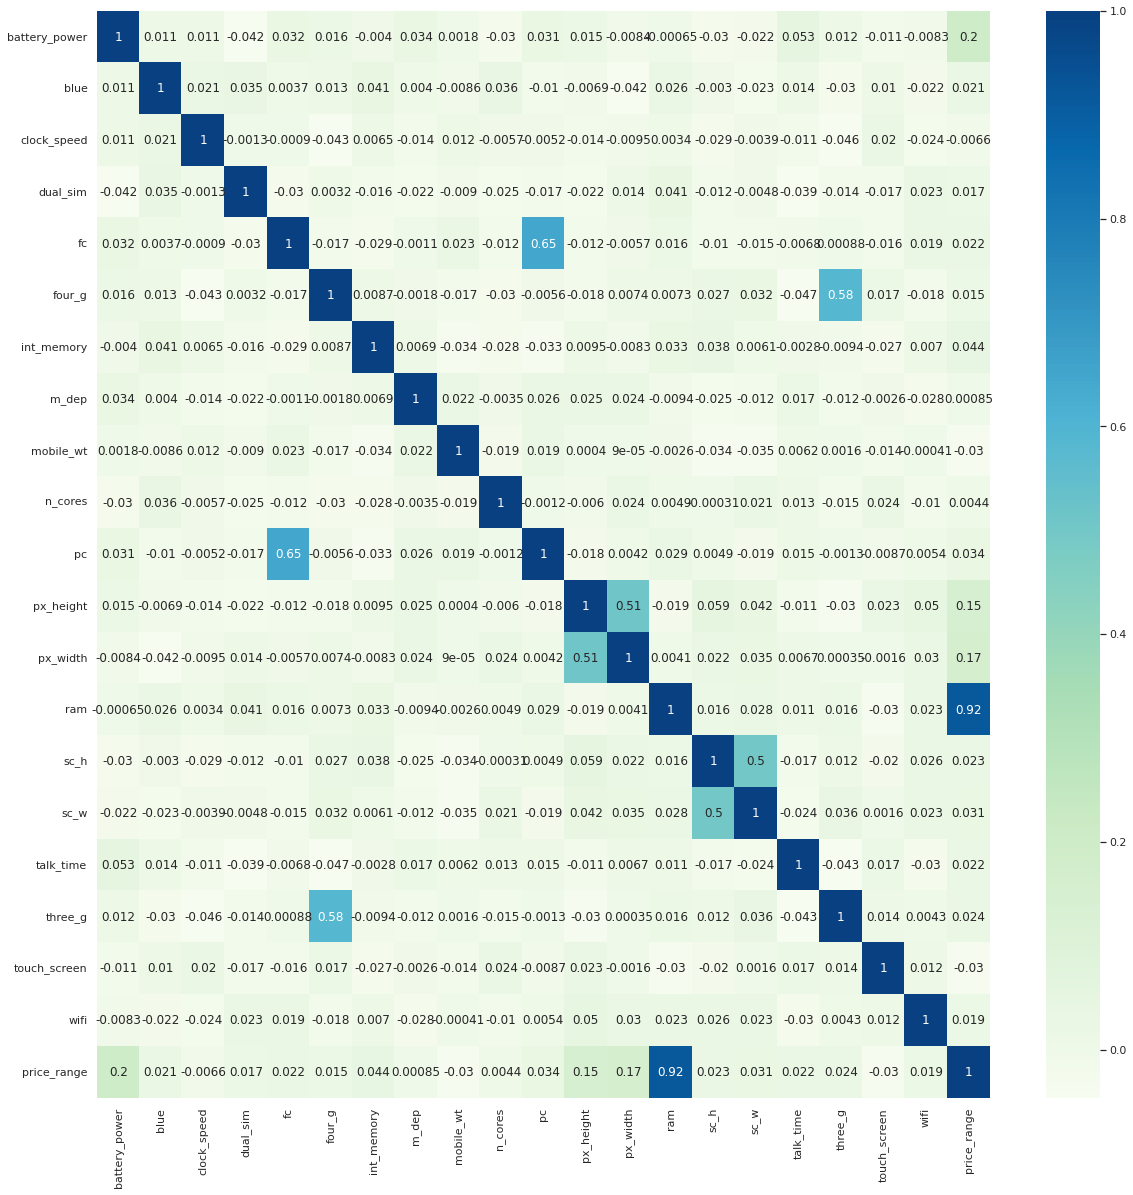

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='GnBu')
plt.show()

**Conclusions from heatmap**

Ram is the variable that has the most influence, as can be seen from the heatmap, while most other variables have very little relationship to price range. Although there is a correlation between the primary camera's mega pixels and the front camera's mega pixels (which makes sense since both indicate the phone model's technology level of resolution), the price range is unaffected. Although 3G and 4G are moderately associated, our dataset does not contain any inputs that are strongly correlated, hence there is no multicollinearity issue.

**Plot of Price_rangs Vs Independent Variables**

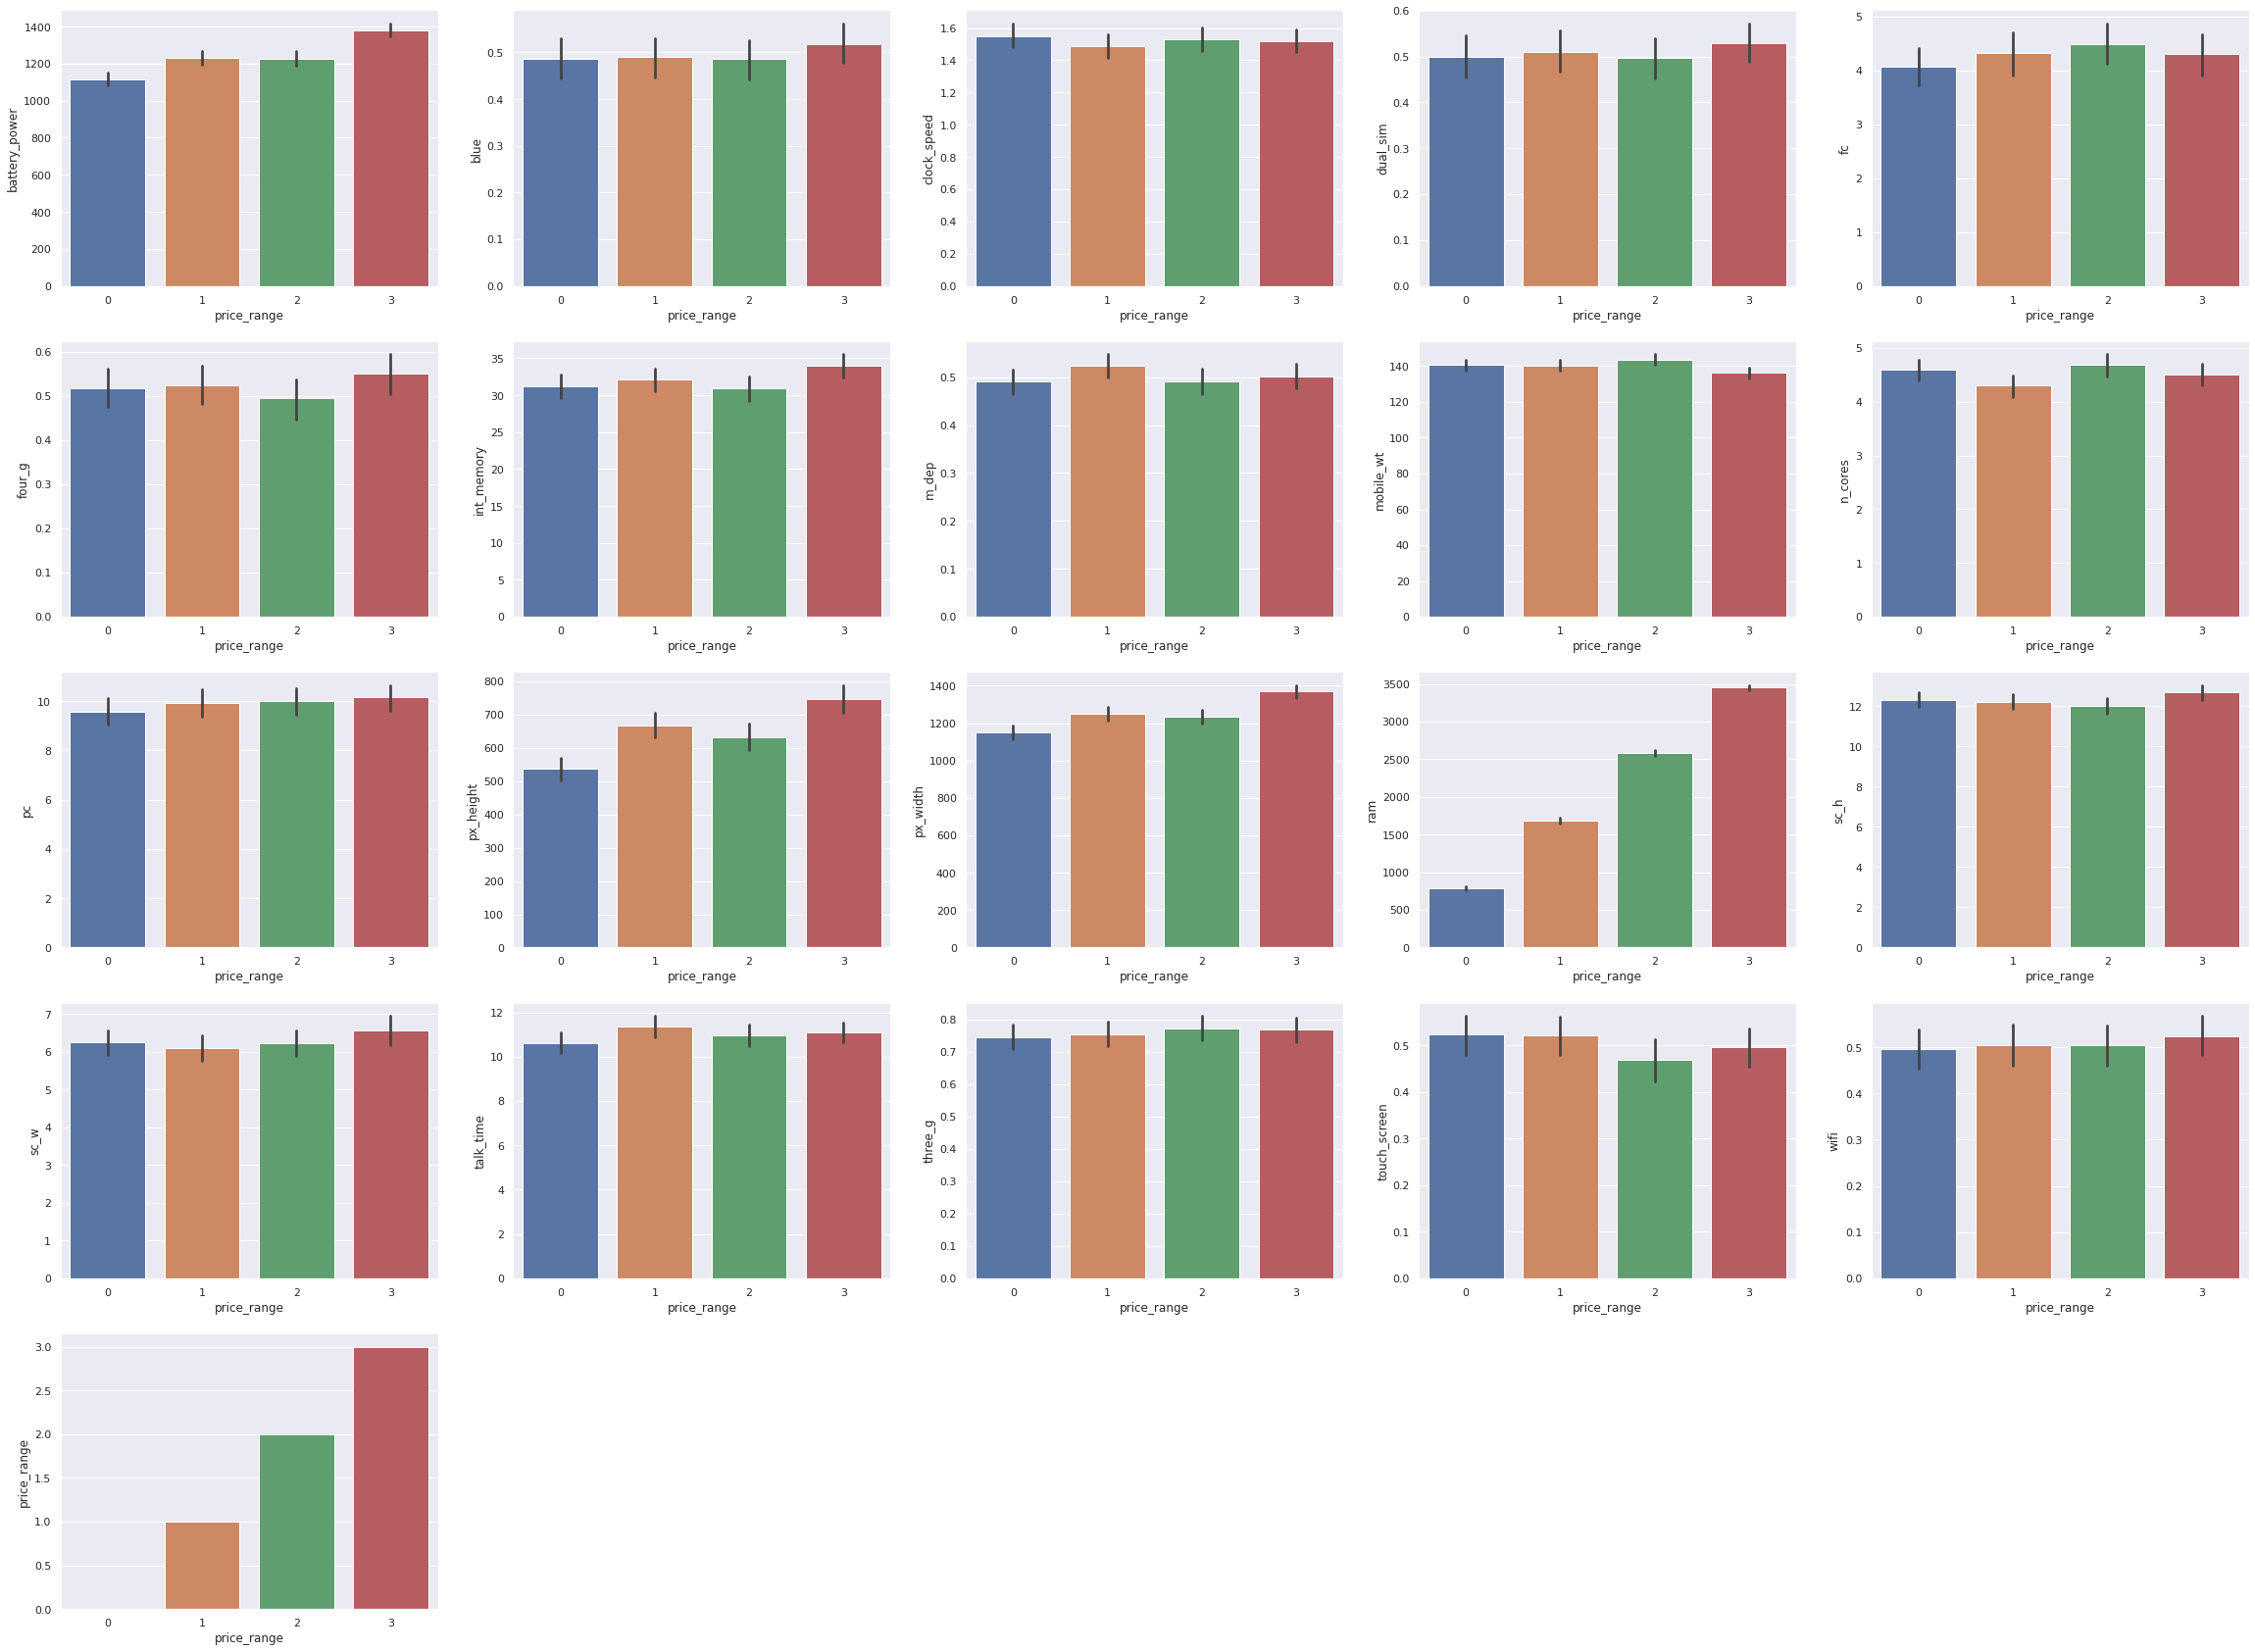

In [ ]:
plt.figure(figsize=(40,30))
j = 1
for i in df.columns:
  plt.subplot(5,5,j)
  sns.barplot(x=df['price_range'],y=df[i])
  j=j+1

#**Feature Engineering**

One of the fundamental ideas in machine learning is feature selection.It significantly affects the performance of your model. Your ability to perform well depends greatly on the data features you use to train your machine learning models.

Reduces Overfitting: Less duplicated data reduces the chance that decisions will be based on noise.

Enhances Accuracy: When there are fewer misleading data, modelling accuracy increases.


Less data points result in less algorithm complexity and quicker training of algorithms, which reduces training time.


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specifications','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best feature

   Specifications          Score
13            ram  931267.519053
11      px_height   17589.263347
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
16      talk_time      13.236400
4              fc      10.454588
15           sc_w      10.047181
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
7           m_dep       0.745820


In [ ]:
#  Defining new variable for pixels

df['pixels'] = df['px_height']*df['px_width']
# Dropping px_height and px_width

df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

In [ ]:
# Defining X and y

X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,pixels
0,842,0,2.2,0,1.0,0,7,0.6,188,2,2,2549,9,7.0,19,0,0,1,1,15120.0
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,6,2631,17,3.0,7,1,1,0,2,1799140.0
2,563,1,0.5,1,2.0,1,41,0.9,145,5,6,2603,11,2.0,9,1,1,0,2,2167308.0
3,615,1,2.5,0,0.0,0,10,0.8,131,6,9,2769,16,8.0,11,1,0,0,2,2171776.0
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,14,1411,8,2.0,15,1,1,0,1,1464096.0


Hence,px_height and px_width has been replaced by new variable pixels.

In [ ]:
X.shape

(2000, 19)

In [ ]:
y.shape

(2000,)

#**Train Test Split**

**Scaling Data**

The process of feature scaling is used to uniformly scale the variety of independent variables or features in data. It is also known as data normalisation or standardisation in the context of data processing. Before utilising machine learning methods to train models, feature scaling is typically done at the data pre-processing stage.

In [ ]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

**Train test split**

When using machine learning algorithms to make predictions on data that was not used to train the model, the train-test split technique is used to measure how well they perform.
In order to test your hypothesis fast and affordably, you should structure your machine learning project as a train test. In essence, it is a method of splitting the training data in half so that you may test your algorithm on one part and assess the results on the rest of the part.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1600, 19)
(400, 19)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(1600,)
(400,)


#**MODELS**

**Choose a Model**
→ Different algorithms are for different tasks; choose the right one

**Train the Model**
→ The goal of training is to answer a question or make a prediction correctly as often as possible
→ Linear regression example: algorithm would need to learn values for m (or W) and b (x is input, y is output)
→ Each iteration of process is a training step

**Evaluate the Model**
→ Uses some metric or combination of metrics to "measure" objective performance of model
→ Test the model against previously unseen data
→ This unseen data is meant to be somewhat representative of model performance in the real world, but still helps tune the model (as opposed to test data, which does not)
→ Good train/eval split? 80/20, 70/30, or similar, depending on domain, data availability, dataset particulars, etc

**Parameter Tuning**
→ This step refers to hyperparameter tuning, which is an "artform" as opposed to a science
→ Tune model parameters for improved performance
→ Simple model hyperparameters may include: number of training steps, learning rate, initialization values and distribution, etc.

**Make Predictions**
→ Using further (test set) data which have, until this point, been withheld from the model (and for which class labels are known), are used to test the model; a better approximation of how the model will perform in the real world

#**1.Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.coef_

array([[-3.29615512e+00,  8.76474095e-02,  1.60974367e-01,
         8.44811016e-02, -2.06341599e-03, -6.68346750e-02,
        -2.42945868e-01, -1.59373433e-01,  4.34194513e-01,
         5.92160526e-02, -1.09605954e-01, -1.37923937e+01,
        -8.73970882e-02, -5.38763957e-02, -1.84840626e-01,
        -5.35237686e-02,  7.33629098e-02,  1.06182454e-01,
        -3.90933773e+00],
       [-8.67398193e-01,  3.35868766e-02, -2.02934579e-01,
         1.47451908e-02,  7.41223206e-02,  5.89657795e-02,
         7.26850068e-02,  2.85840486e-01,  2.51702531e-01,
        -3.43718222e-01, -1.32300732e-01, -3.85632425e+00,
         4.84697600e-02, -2.37606775e-01,  1.07890081e-01,
        -5.03064761e-02,  9.40123597e-02,  8.85108565e-03,
        -8.44991204e-01],
       [ 7.76428848e-01, -4.85284317e-02, -1.52094197e-03,
        -1.05255162e-01,  1.52707326e-01, -1.46273809e-01,
        -1.64382466e-01, -2.28451932e-01,  1.35351991e-01,
         1.99396252e-01, -4.21370497e-02,  4.04324637e+00,
    

In [ ]:
lr.intercept_

array([  8.1874367 ,   3.64261897,  -1.19896583, -10.63108985])

In [ ]:
y_pred_test_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

In [ ]:
# Evaluation metrics for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train_lr, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       415
           1       0.86      0.88      0.87       389
           2       0.84      0.88      0.86       382
           3       0.96      0.93      0.94       414

    accuracy                           0.91      1600
   macro avg       0.91      0.90      0.90      1600
weighted avg       0.91      0.91      0.91      1600



In [ ]:
#Evaluation matrix for test

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test_lr, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       102
           1       0.86      0.86      0.86       100
           2       0.80      0.85      0.82        94
           3       0.95      0.91      0.93       104

    accuracy                           0.90       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



[[97  3  0  0]
 [ 5 86  9  0]
 [ 0 11 80  9]
 [ 0  0  5 95]]


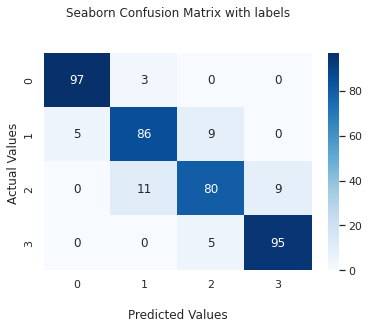

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test_lr)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
trainscore_lr =  lr.score(X_train,y_train)
testscore_lr =  lr.score(X_test,y_test)  

print("train score for lr: {}".format(trainscore_lr),'\n')
print("test score for lr: {}".format(testscore_lr),'\n')

train score for lr: 0.905625 

test score for lr: 0.895 



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score_lr=accuracy_score(y_test, y_pred_test_lr)
accuracy_score_lr

0.895

**NOTE:** When True Positives and True Negatives are more important than False Positives and False Negatives, accuracy is employed; when False Positives and False Negatives are more important, F1-score is utilised. When the class distribution is similar, accuracy can be employed, but F1-score is a better statistic when there are unbalanced classes.

**accuracy_score:**determines the degree of accuracy between a set of predicted labels and the actual labels.

**Precision:** The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 

**Recall:**The recall is determined as the proportion of Positive samples that were correctly identified as Positive to all Positive samples. The recall evaluates how well the model can identify Positive samples. The more positive samples that are identified, the larger the recall.

**Hyperparameter Tuning:** 

The process of hyperparameter tuning entails determining a set of ideal hyperparameter values for a learning algorithm and then using this improved algorithm on each given data set. The model's performance is maximised by using that set of hyperparameters, which minimises a predetermined loss function and resulting in better results with fewer errors.

**Cross Validation:** 

Cross validation is a machine learning approach used to assess a model's performance on unseen data.
Cross validation's primary goal is to prevent overfitting, which happens when a model is overtrained on training data and underperforms on fresh, untainted data. Cross validation gives a more accurate indication of the model's generalisation performance, or its capacity to perform well on fresh, untested data, by testing the model on numerous validation sets.

**Logistic Regression-Hyperparameter Tuning and Cross validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search_lr.fit(X_train, y_train)   

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [ ]:
y_pred_test_grid = grid_search_lr.predict(X_test)
y_pred_train_grid = grid_search_lr.predict(X_train)

In [ ]:
# Evaluation matrix for train

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression GridSearch(Train set)= ')
print( classification_report( y_train,y_pred_train_grid))

Classification report for Logistic Regression GridSearch(Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       400
           1       0.95      0.94      0.94       400
           2       0.93      0.93      0.93       400
           3       0.97      0.97      0.97       400

    accuracy                           0.95      1600
   macro avg       0.95      0.96      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [ ]:
#Evaluation matrix for test

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression GridSearch (Test set)= ')
print(classification_report(y_pred_test_grid, y_test))

Classification report for Logistic Regression GridSearch (Test set)= 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.93      0.95      0.94        98
           2       0.92      0.92      0.92       100
           3       0.96      0.95      0.96       101

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



[[98  2  0  0]
 [ 3 93  4  0]
 [ 0  3 92  5]
 [ 0  0  4 96]]


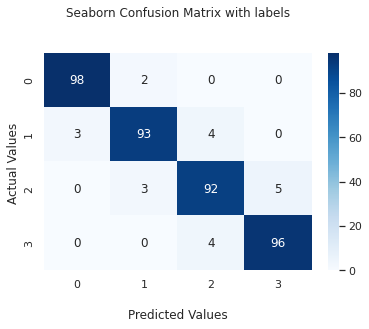

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test_grid)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
trainscore_lr_g =  grid_search_lr.score(X_train,y_train)
testscore_lr_g =  grid_search_lr.score(X_test,y_test)  

print("train score: {}".format(trainscore_lr_g),'\n')
print("test score: {}".format(testscore_lr_g),'\n')

train score: 0.955 

test score: 0.9475 



In [ ]:
accuracy_score_lr_g=accuracy_score(y_test,y_pred_test_grid)
accuracy_score_lr_g

0.9475

#**2.Decision Tree**

In [ ]:
# Decision Tree
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_test_dtc = dtc.predict(X_test)
y_train_dtc = dtc.predict(X_train)

In [ ]:
# Evaluation matrix for test

print('Classification report for Decision Tree (Test set)= ')
print(classification_report(y_test_dtc, y_test))

Classification report for Decision Tree (Test set)= 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        95
           1       0.84      0.79      0.82       106
           2       0.73      0.78      0.76        93
           3       0.93      0.88      0.90       106

    accuracy                           0.85       400
   macro avg       0.86      0.86      0.85       400
weighted avg       0.86      0.85      0.86       400



[[92  8  0  0]
 [ 3 84 13  0]
 [ 0 14 73 13]
 [ 0  0  7 93]]


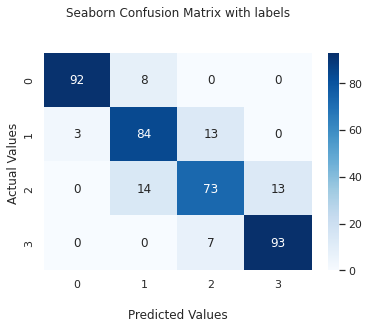

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_dtc)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_dtc)

0.855

In [ ]:
accuracy_score_dtc=accuracy_score(y_test,y_test_dtc)
accuracy_score_dtc

0.855

**Decision Tree-Hyperparameter Tuning and Cross Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_dtc = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 5, verbose = 24)
grid_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.816 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.778 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.822 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.716 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.775 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
# Prediction

y_test_dtcg = grid_dtc.predict(X_test)
y_train_dtcg = grid_dtc.predict(X_train)

In [ ]:
# Evaluation matrix for train

print('Classification Report for Decision Tree Opti. (Train set)= ')
print(classification_report(y_train, y_train_dtcg))

Classification Report for Decision Tree Opti. (Train set)= 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       400
           1       0.97      0.97      0.97       400
           2       0.96      0.98      0.97       400
           3       0.99      0.98      0.99       400

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



In [ ]:
# Evaluation matrix for test

print('Classification Report for Decision Tree Opti. (Test set)= ')
print(classification_report(y_test, y_test_dtcg))

Classification Report for Decision Tree Opti. (Test set)= 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.85      0.81      0.83       100
           2       0.78      0.81      0.79       100
           3       0.92      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



[[97  3  0  0]
 [ 3 81 16  0]
 [ 0 11 81  8]
 [ 0  0  7 93]]


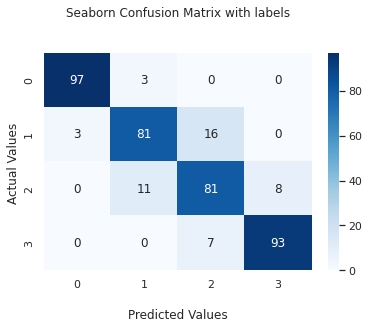

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_dtcg)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
accuracy_score_dtcg=accuracy_score(y_test,y_test_dtcg)
accuracy_score_dtcg

0.88

#**3.Random Forest**

In [ ]:
# Applying random forest with 200 trees
clsr = RandomForestClassifier(n_estimators=200)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_train_clsr = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_train_clsr)
train_score

1.0

In [ ]:
y_test_clsr = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_test_clsr)
test_score

0.885

In [ ]:
#Evaluation matrix for test
print('Classification Report for Random Forest  (Test set)= ')
print(classification_report(y_test, y_test_clsr))

Classification Report for Random Forest  (Test set)= 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.86      0.84      0.85       100
           2       0.80      0.82      0.81       100
           3       0.93      0.91      0.92       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.88       400



[[97  3  0  0]
 [ 5 84 11  0]
 [ 0 11 82  7]
 [ 0  0  9 91]]


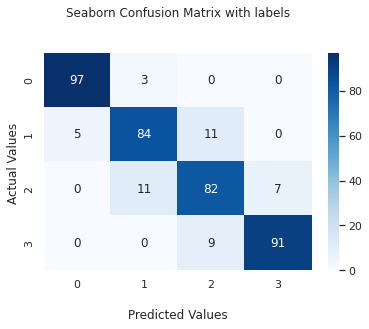

In [ ]:
#Confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_clsr)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
accuracy_score_clsr=accuracy_score(y_test,y_test_clsr)
accuracy_score_clsr

0.885

**Random Forest-Hyperparameter Tuning and Cross Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 30]
          }
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, params, scoring='accuracy', cv=5)
rf_grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [ ]:
rf_grid.best_params_

{'max_depth': 40,
 'max_features': 'auto',
 'max_leaf_nodes': 30,
 'min_samples_split': 6,
 'n_estimators': 50}

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=40, max_leaf_nodes=30, min_samples_split=6,
                       n_estimators=50)

In [ ]:
rf_grid.best_score_

0.8560000000000001

In [ ]:
rf_grid= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf_grid.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=30, n_estimators=50)

In [ ]:
y_train_rfgrid = rf_grid.predict(X_train)
accuracy_score(y_train, y_train_rfgrid)

0.931875

In [ ]:
#Evaluation metric for train

print('Classification Report for Random Forest GridSearch (Train set)= ')
print(classification_report(y_train, y_train_rfgrid))

Classification Report for Random Forest GridSearch (Train set)= 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       400
           1       0.90      0.86      0.88       400
           2       0.92      0.91      0.91       400
           3       0.97      0.99      0.98       400

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



In [ ]:
y_test_rfgrid = rf_grid.predict(X_test)
accuracy_score(y_test, y_test_rfgrid)

0.86

In [ ]:
#Evaluation matrix for Test

print('Classification Report for Random Forest GridSearch (Test set)= ')
print(classification_report(y_test, y_test_rfgrid))

Classification Report for Random Forest GridSearch (Test set)= 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       100
           1       0.80      0.78      0.79       100
           2       0.80      0.75      0.77       100
           3       0.92      0.93      0.93       100

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



[[98  2  0  0]
 [ 9 78 12  1]
 [ 0 18 75  7]
 [ 0  0  7 93]]


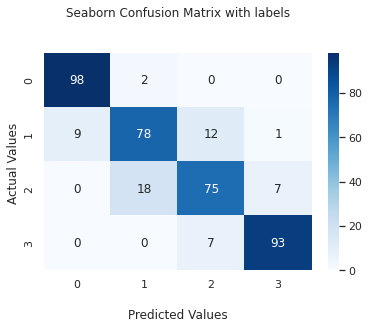

In [ ]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_rfgrid)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
accuracy_score_rfg=accuracy_score(y_test,y_test_rfgrid)
accuracy_score_rfg

0.86

#**4.Support Vector Machine**

In [ ]:
# Applying SVM
from sklearn.svm import SVC
svm = SVC()
svm_model = svm.fit(X_train,y_train)
svm_predict = svm_model.predict(X_test)
accuracy_score_svm = accuracy_score(y_test,svm_predict)
print("Accuracy of the svm model: ", accuracy_score_svm * 100)

Accuracy of the svm model:  85.0


In [ ]:
#Evaluation matrix for Test

from sklearn.metrics import classification_report
print('Classification Report for SVM (Test set)= ')
print(classification_report(y_test, svm_predict))



Classification Report for SVM (Test set)= 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       100
           1       0.82      0.76      0.79       100
           2       0.77      0.82      0.80       100
           3       0.91      0.90      0.90       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



[[92  8  0  0]
 [10 76 14  0]
 [ 0  9 82  9]
 [ 0  0 10 90]]


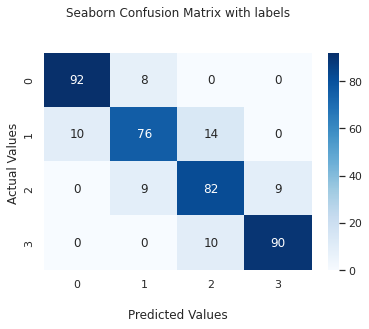

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, svm_predict)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

**SVM-Hypeparameter Tuning and Cross Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': [.1,.5,.25,1],
             'kernel':['rbf','poly','sigmoid','linear']}
svm_grid = GridSearchCV(SVC(),param_grid,cv=5)

In [ ]:
svm_grid_1 = svm_grid.fit(X_train,y_train)
print("the parameters {} are the best.".format(svm_grid.best_params_))
print("the best score is {:.2f}.".format(svm_grid.best_score_))

the parameters {'gamma': 0.1, 'kernel': 'linear'} are the best.
the best score is 0.91.


In [ ]:
SVM = SVC(
    gamma = 0.1,
    kernel = 'linear'
)

In [ ]:
svm_grid_2 = SVM.fit(X_train,y_train)

In [ ]:
svm_test_2  = svm_grid_2.predict(X_test)

In [ ]:
#Evalutaion matrix for Test

from sklearn.metrics import classification_report
print('Classification Report for SVM Opti. (Test set)= ')
print(classification_report(y_test, svm_test_2))


Classification Report for SVM Opti. (Test set)= 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.92      0.91      0.91       100
           2       0.87      0.87      0.87       100
           3       0.93      0.94      0.94       100

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.92       400
weighted avg       0.92      0.93      0.92       400



[[98  2  0  0]
 [ 2 91  7  0]
 [ 0  6 87  7]
 [ 0  0  6 94]]


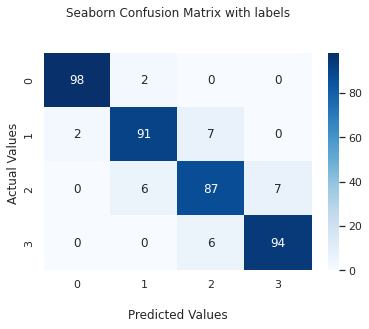

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test,svm_test_2)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(accuracy_score(y_test,svm_test_2))
accuracy_score_svmg = accuracy_score(y_test,svm_test_2)

0.925


#**5.K Nearest Neighbour**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_test_knn = knn.predict(X_test)
accuracy_score_knn = accuracy_score(y_test,y_test_knn)
print("Accuracy of the KNeighbors Classifier model: ", accuracy_score_knn)

Accuracy of the KNeighbors Classifier model:  0.4225


In [ ]:
# Evaluation matix for Test

from sklearn.metrics import classification_report
print('Classification report for KNN (Test)=')
print(classification_report(y_test,y_test_knn))

Classification report for KNN (Test)=
              precision    recall  f1-score   support

           0       0.53      0.69      0.60       100
           1       0.29      0.30      0.29       100
           2       0.31      0.30      0.31       100
           3       0.57      0.40      0.47       100

    accuracy                           0.42       400
   macro avg       0.43      0.42      0.42       400
weighted avg       0.43      0.42      0.42       400



[[69 23  6  2]
 [39 30 24  7]
 [17 32 30 21]
 [ 4 20 36 40]]


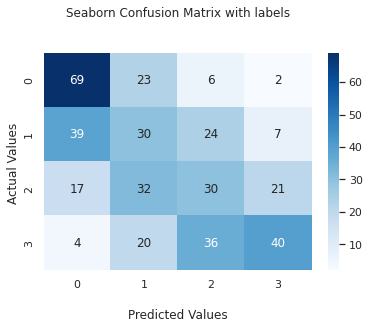

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_knn)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

**KNN-Hyperparameter Tuning and Cross Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [ ]:
#Defining parameter range
grid = GridSearchCV(knn, param_grid, cv=15, scoring='accuracy', return_train_score=False,verbose=1)

In [ ]:
knn_g=grid.fit(X_train, y_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


In [ ]:
knn_g.best_params_

{'n_neighbors': 30}

In [ ]:
# Evaluation for train
accuracy_train_knn=knn_g.best_score_
accuracy_train_knn

0.485563980485511

In [ ]:
# Evaluation for test
y_test_knng=knn_g.predict(X_test)

In [ ]:
# Evaluation matrix for Test

from sklearn.metrics import classification_report
print('Classification report for KNN Opti.(Test)=')
print(classification_report(y_test,y_test_knng))

Classification report for KNN Opti.(Test)=
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       100
           1       0.33      0.29      0.31       100
           2       0.39      0.41      0.40       100
           3       0.62      0.51      0.56       100

    accuracy                           0.48       400
   macro avg       0.48      0.48      0.48       400
weighted avg       0.48      0.48      0.48       400



[[71 26  3  0]
 [43 29 22  6]
 [10 24 41 25]
 [ 0 10 39 51]]


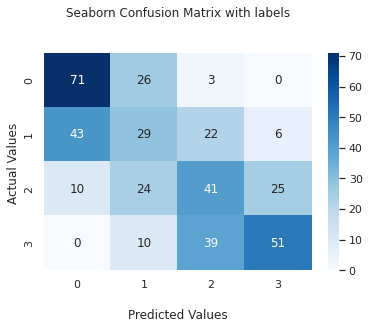

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_test_knng)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
accuracy_score_knng=accuracy_score(y_test,y_test_knng)
accuracy_score_knng

0.48

#**Result**

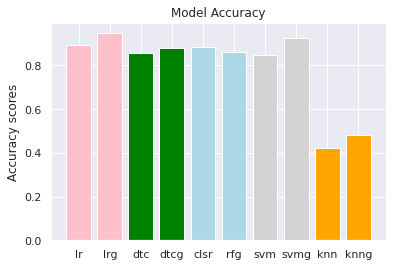

In [ ]:
#Bar graph of accuracy score of models perfromed
models = ['lr', 'lrg', 'dtc','dtcg','clsr','rfg','svm','svmg','knn','knng']
acc_scores =[accuracy_score_lr,accuracy_score_lr_g,accuracy_score_dtc,accuracy_score_dtcg,accuracy_score_clsr,accuracy_score_rfg,accuracy_score_svm,accuracy_score_svmg,accuracy_score_knn,accuracy_score_knng]

plt.bar(models, acc_scores, color=['pink','pink', 'green','green', 'lightblue','lightblue','lightgrey','lightgrey','orange','orange'])
plt.ylabel("Accuracy scores")
plt.title("Model Accuracy")
plt.show()

**Model Selection**

Among the models, the optimization-based logistic regression model with an accuracy score of 94.75% and the SVM optimization model with an accuracy score of 92.5% both performed well.

KNN was the model that did the poorest. The accuracy score improved from 42% to 48% even after optimization.

Decision tree and random forest classifiers' performance with optimization was adequate.

Logistic regression is effective with variables that have already been determined to be independent while SVM is effective with unstructured and semi-structured data, such as text and images.

Logistic regression is based on statistical methods whereas SVM is based on the geometrical characteristics of the data.

Logistic regression and SVM with a linear kernel both were effective, however depending on features, logistic regression model proved to be more effective than the others.

#**Conclusions**

1. According to EDA, there are mobile phones available in four pricing groups.

2. Ram's is the deciding factor for price range and it continuously rises as it moves from low to high cost.

3. In determining the pricing range of a mobile phone, RAM, battery life, and pixels were more important factors.


4. Around 50% of the mobiles have Bluetooth.As the price range widens, battery capacity gradually increases.Expensive phones now weigh less.


5. Based on the results of the aforementioned trials,it has been concluded that logistic regression model and SVM optimized model performed effectively.Confusion matix evaluation is used to assess model performance and accuracy.

#**Thank You**
